<a href="https://colab.research.google.com/github/Mayan-Ryan/QML/blob/main/Skin_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the dataset

In [1]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 27 kB/s 
     |████████████████████████████████| 463 kB 8.6 MB/s 
     |████████████████████████████████| 1.3 MB 53.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab202207

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from PIL import Image
from tqdm import tqdm

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manavtaluja","key":"bcf91617b5ae9f8e88066971bf42e398"}'}

In [4]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Sep 22 11:57 kaggle.json


In [5]:
!pip install -q kaggle

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

100% 5.19G/5.20G [01:20<00:00, 115MB/s]
100% 5.20G/5.20G [01:20<00:00, 68.9MB/s]


In [8]:
!unzip skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [9]:
skin_df = pd.read_csv('/content/HAM10000_metadata.csv')
image_path= {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join('/content/HAM10000_images_part_*/','*.jpg'))}
skin_df['path'] = skin_df['image_id'].map(image_path.get)
skin_df['path'].dropna().map(lambda x: np.asarray(Image.open(x).resize((32,32))))
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32)))) 

In [10]:
skin_df.groupby(['dx']).count()

,lesion_id,image_id,dx_type,age,sex,localization,path,image
dx,,,,,,,,
akiec,327,327,327,327,327,327,327,327
bcc,514,514,514,514,514,514,514,514
bkl,1099,1099,1099,1089,1099,1099,1099,1099
df,115,115,115,115,115,115,115,115
mel,1113,1113,1113,1111,1113,1113,1113,1113
nv,6705,6705,6705,6660,6705,6705,6705,6705
vasc,142,142,142,142,142,142,142,142


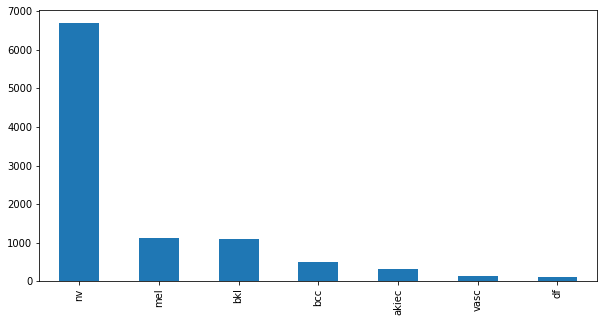

In [29]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)

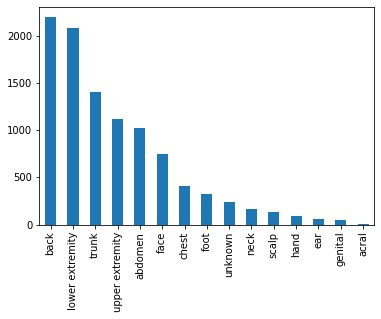

In [30]:
skin_df['localization'].value_counts().plot(kind='bar')

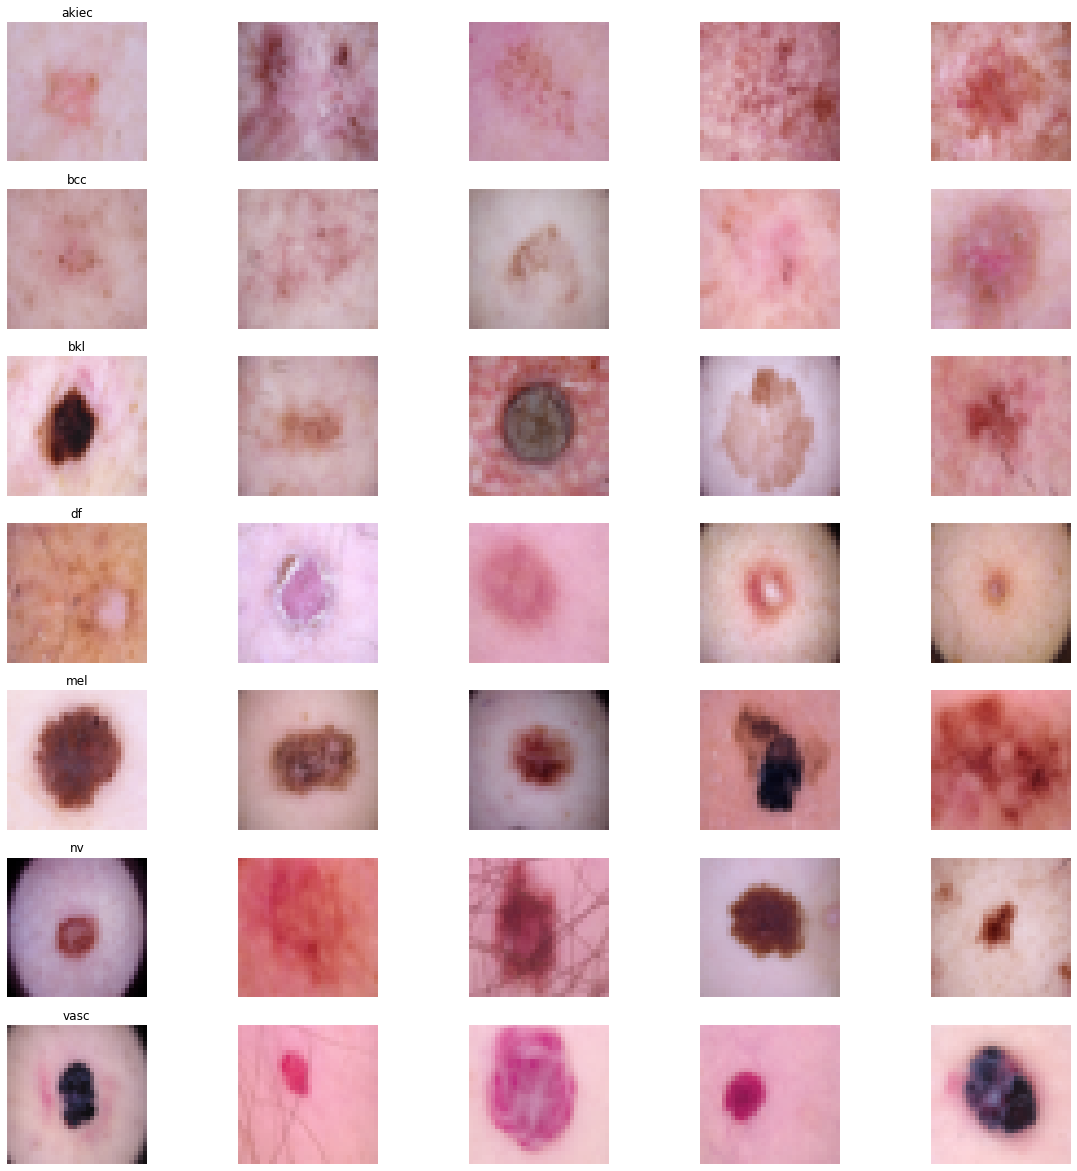

In [11]:
n_samples = 5 
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

## Data Processing 

In [12]:
data = pd.read_csv('/content/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [16]:
y = data['label']
X = data.drop(columns = ['label'])

In [17]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler()
X,y  = oversample.fit_resample(X,y)

In [19]:
from sklearn.model_selection import train_test_split
X = np.array(X).reshape(-1,28,28,3)
X = (X-np.mean(X))/np.std(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

## CNN Model

In [33]:
import tensorflow as tf
import seaborn as sns
from tensorflow import keras 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [22]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20
235/235 [==============================] - ETA: 0s - loss: 1.3178 - accuracy: 0.4844
Epoch 00001: saving model to best_model.h5
235/235 [==============================] - 41s 172ms/step - loss: 1.3178 - accuracy: 0.4844 - val_loss: 0.9120 - val_accuracy: 0.6529
Epoch 2/20
235/235 [==============================] - ETA: 0s - loss: 0.7419 - accuracy: 0.7245
Epoch 00002: saving model to best_model.h5
235/235 [==============================] - 39s 165ms/step - loss: 0.7419 - accuracy: 0.7245 - val_loss: 0.5652 - val_accuracy: 0.7945
Epoch 3/20
235/235 [==============================] - ETA: 0s - loss: 0.4744 - accuracy: 0.8248
Epoch 00003: saving model to best_model.h5
235/235 [==============================] - 42s 180ms/step - loss: 0.4744 - accuracy: 0.8248 - val_loss: 0.3925 - val_accuracy: 0.8518
Epoch 4/20
235/235 [==============================] - ETA: 0s - loss: 0.3264 - accuracy: 0.8805
Epoch 00004: saving model to best_model.h5
235/235 [==============================] -

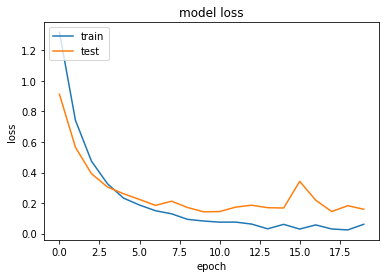

In [40]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

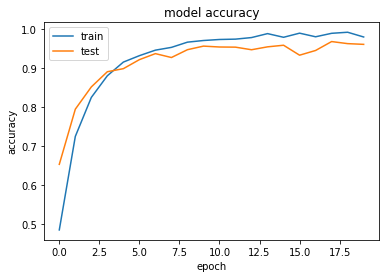

In [41]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
score = model.evaluate(X_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

294/294 [==============================] - 4s 14ms/step - loss: 0.1703 - accuracy: 0.9596
Test Loss: 0.17029231786727905
Test accuracy: 0.9596250057220459


In [38]:
def predict_class(img_path1):
    classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
    img1 = image.load_img(img_path1,color_mode='rgb', target_size=(28,28))
    display(img1)
    x1 = image.img_to_array(img1)
    x1.shape
    x1 = np.expand_dims(x1, axis=0)
    x1 = preprocess_input(x1)
    y_pred = model.predict(x1)
    MaxPosition=np.argmax(y_pred)  
    prediction_label=classes[MaxPosition]
    return prediction_label

In [39]:
img_path1= '/content/ham10000_images_part_1/ISIC_0025305.jpg'
predict_class(img_path1)

'nv'